In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
video=pd.read_csv('/content/Videos3.csv')

In [5]:
video.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...


In [6]:
#How long does it take for the video to get trending
video.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38916 entries, 0 to 38915
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                38916 non-null  object
 1   trending_date           38916 non-null  object
 2   title                   38916 non-null  object
 3   channel_title           38916 non-null  object
 4   category_id             38916 non-null  int64 
 5   publish_time            38916 non-null  object
 6   tags                    38916 non-null  object
 7   views                   38916 non-null  int64 
 8   likes                   38916 non-null  int64 
 9   dislikes                38916 non-null  int64 
 10  comment_count           38916 non-null  int64 
 11  thumbnail_link          38916 non-null  object
 12  comments_disabled       38916 non-null  bool  
 13  ratings_disabled        38916 non-null  bool  
 14  video_error_or_removed  38916 non-null  bool  
 15  de

Cleaning Date time format

In [7]:
import datetime
from datetime import datetime

In [8]:
video['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
38911    18.14.06
38912    18.14.06
38913    18.14.06
38914    18.14.06
38915    18.14.06
Name: trending_date, Length: 38916, dtype: object

In [9]:
video['trending_date']=video['trending_date'].map(lambda x:datetime.strptime(x, '%y.%d.%m'))

In [10]:
video['publish_time']=video['publish_time'].map(lambda x: x.split('T')[0]).map(lambda x:datetime.strptime(x, '%Y-%m-%d'))

In [11]:
video['publish_time']=pd.to_datetime(video['publish_time'])

In [12]:
trending_duration=(video['trending_date']-video['publish_time']).dt.days

checking distribution of views

<Axes: ylabel='Density'>

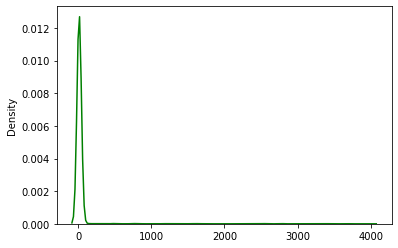

In [13]:
sns.kdeplot(trending_duration,color="Green")

In [14]:
print('Average time in days for video to get trending is {}'.format(np.ceil(trending_duration.mean())))
print('Median of trending duration is',(trending_duration).median())

Average time in days for video to get trending is 37.0
Median of trending duration is 10.0


In [15]:
len(trending_duration)#total videos uploaded

38916

In [16]:
len(trending_duration[trending_duration>3]) #to videos which started trending more than 3 days of publishing

33609

In [17]:
#So on an average it takes 37 days for video to get trending but most of the videos took more then 3 days to get trending

In [18]:
#Q2.How is this duration changes across the two years

In [19]:
video['publish_time'].dt.year.value_counts()

2018    27374
2017    11037
2015       93
2011       85
2014       66
2013       62
2016       58
2008       43
2007       37
2010       34
2012       14
2009       13
Name: publish_time, dtype: int64

In [20]:
past_two_year=video['publish_time'].dt.year[video['publish_time'].dt.year>2015] #filtering videos published after 2016

Text(0, 0.5, 'Number of days to get Trending')

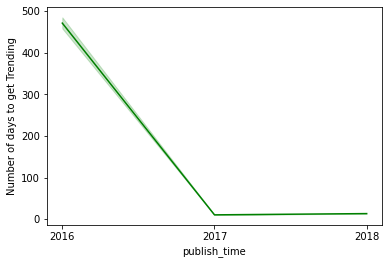

In [21]:
sns.lineplot(x=past_two_year,y=trending_duration,color="Green")
plt.xticks([2016,2017,2018,])
plt.ylabel('Number of days to get Trending')

we can observe drastic dicline in the duration required for video to get trending from 2016 to 2018

In [22]:
#Q3.Channels having multiple trending videos and how many times

In [23]:
trending_by_channel=video['channel_title'].value_counts()#number of videos uploaded by each channel

<Axes: >

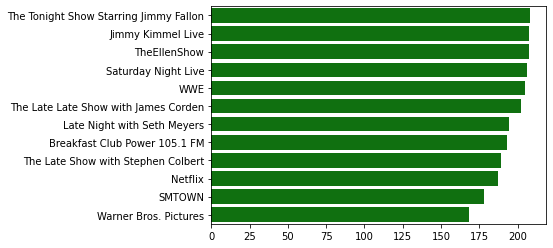

In [24]:
sns.barplot(y=trending_by_channel[trending_by_channel>1].head(12).index,
            x=trending_by_channel[trending_by_channel>1].head(12).values,color='Green')

The 'Tonight show starring jimmy fallon' Channel and'Jimmy kimmel live' has highest trending videos followed by 'The Ellen Show'.

In [25]:
#Analysing views and comment

<Axes: xlabel='comment_count', ylabel='views'>

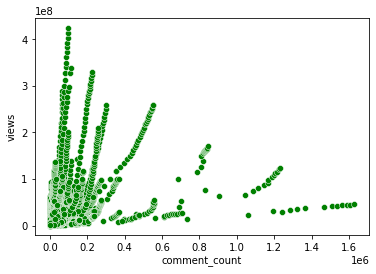

In [26]:
sns.scatterplot(y=video['views'],x=video['comment_count'],color="Green")

In [27]:
#Comments are not contributing that much for views 

<Axes: xlabel='likes', ylabel='views'>

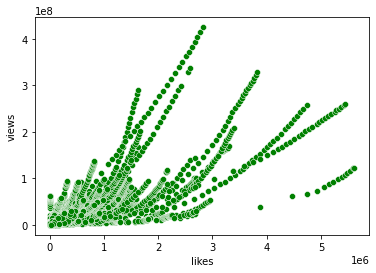

In [28]:
sns.scatterplot(y=video['views'],x=video['likes'],color="Green")

Views increase with more likes 

<Axes: >

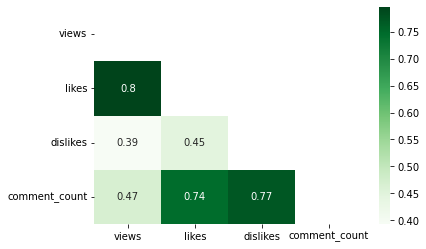

In [29]:
sns.heatmap(video[['views','likes','dislikes','comment_count']].corr(),cmap='Greens',annot=True,
           mask=np.triu(video[['views','likes','dislikes','comment_count']].corr()))

In [30]:
#

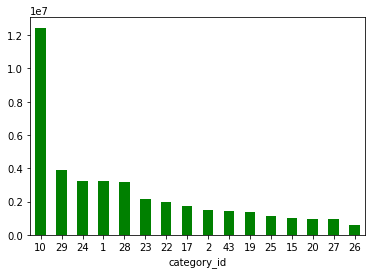

In [31]:
video.groupby(by=['category_id'])['views'].mean().sort_values(ascending=False).plot(kind='bar',color="Green")
plt.xticks(rotation=360);

In [32]:
video['category_id'].value_counts()

10    13754
24     9124
22     2926
1      2577
26     1928
17     1907
23     1828
20     1788
25     1225
15      534
28      518
27      457
2       144
19       96
29       90
43       20
Name: category_id, dtype: int64